# STEP 1 - Importing Packages and Performing Basic Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the data
# Please note - I have changed the name of the original .csv file to "Marketing_Dataset.csv"
df = pd.read_csv("Marketing_Dataset.csv")

# Display the first few rows of the dataset
df.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 28 columns]

In [2]:
# Display no. of rows & columns
df.shape

(2240, 28)

In [3]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

# STEP 2 - Fixing the "Dt_Customer" column

In [4]:
from datetime import datetime

# Convert 'Dt_Customer' to a uniform date format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# Calculate the number of days since enrollment
# Here i am taking "Today's date = 31st Dec 2023"
enrollment_date = pd.to_datetime('31-12-2023', format='%d-%m-%Y')
df['Days_Since_Enrollment'] = (enrollment_date - df['Dt_Customer']).dt.days

# Display the updated DataFrame
df.head(50)

C:\Users\sun24\AppData\Local\Temp\ipykernel_11680\1449127132.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')


ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0    1826        1970  Graduation       Divorced  $84,835.00         0   
1       1        1961  Graduation         Single  $57,091.00         0   
2   10476        1958  Graduation        Married  $67,267.00         0   
3    1386        1967  Graduation       Together  $32,474.00         1   
4    5371        1989  Graduation         Single  $21,474.00         1   
5    7348        1958         PhD         Single  $71,691.00         0   
6    4073        1954    2n Cycle        Married  $63,564.00         0   
7    1991        1967  Graduation       Together  $44,931.00         0   
8    4047        1954         PhD        Married  $65,324.00         0   
9    9477        1954         PhD        Married  $65,324.00         0   
10   2079        1947    2n Cycle        Married  $81,044.00         0   
11   5642        1979      Master       Together  $62,499.00         1   
12  10530        1959         PhD          Widow  $67,786.00         0   
13   2964        1981  Graduation        Married  $26,872.00         0   
14  10311        1969  Graduation        Married   $4,428.00         0   
15    837        1977  Graduation        Married  $54,809.00         1   
16  10521        1977  Graduation        Married  $54,809.00         1   
17  10175        1958         PhD       Divorced  $32,173.00         0   
18   1473        1960    2n Cycle         Single  $47,823.00         0   
19   2795        1958      Master         Single  $30,523.00         2   
20   2285        1954      Master       Together  $36,634.00         0   
21    115        1966      Master         Single  $43,456.00         0   
22  10470        1979      Master        Married  $40,662.00         1   
23   4065        1976         PhD        Married  $49,544.00         1   
24  10968        1969  Graduation         Single  $57,731.00         0   
25   5985        1965      Master         Single  $33,168.00         0   
26   5430        1956  Graduation       Together  $54,450.00         1   
27   8432        1956  Graduation       Together  $54,450.00         1   
28    453        1956         PhD          Widow  $35,340.00         1   
29   9687        1975  Graduation         Single  $73,170.00         0   
30   8890        1971         PhD       Divorced  $65,808.00         1   
31   9264        1986  Graduation        Married  $79,529.00         0   
32   5824        1972         PhD       Together  $34,578.00         2   
33   5794        1974         PhD        Married  $46,374.00         0   
34   3068        1990  Graduation        Married  $18,351.00         0   
35   7962        1987         PhD         Single  $95,169.00         0   
36   2681        1984    2n Cycle        Married  $65,370.00         0   
37  10141        1960      Master       Divorced  $39,228.00         0   
38   3725        1961         PhD         Single  $84,865.00         0   
39   3767        1968  Graduation        Married  $61,314.00         0   
40   5585        1972  Graduation         Single  $21,359.00         1   
41   7030        1955         PhD        Married  $66,465.00         0   
42   1524        1983    2n Cycle         Single  $81,698.00         0   
43   3657        1986  Graduation         Single  $39,146.00         1   
44   5740        1970    2n Cycle       Divorced  $25,959.00         1   
45   9595        1961  Graduation       Together  $64,260.00         0   
46   3158        1973  Graduation        Married  $32,300.00         1   
47   5114        1965      Master        Married  $74,806.00         0   
48    340        1970  Graduation       Divorced  $72,967.00         0   
49   8805        1960  Graduation         Single  $48,904.00         0   

    Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0          0  2014-06-16        0       189  ...                  1   
1          0  2014-06-15        0       464  ...                  5   
2          1  2014-

# STEP 3 - Fixing the "Income" column

In [5]:
# Remove leading and trailing whitespaces from all column names
# This will rename the ' Income' column to 'Income' without the leading space
df.columns = df.columns.str.strip()

In [6]:
# Check for missing values in 'Income'
df[df['Income'].isnull()]

ID  Year_Birth   Education Marital_Status Income  Kidhome  Teenhome  \
134    8996        1957         PhD        Married    NaN        2         1   
262    1994        1983  Graduation        Married    NaN        1         0   
394    3769        1972         PhD       Together    NaN        1         0   
449    5255        1986  Graduation         Single    NaN        1         0   
525    8268        1961         PhD        Married    NaN        0         1   
590   10629        1973    2n Cycle        Married    NaN        1         0   
899   10475        1970      Master       Together    NaN        0         1   
997    9235        1957  Graduation         Single    NaN        1         1   
1096   4345        1964    2n Cycle         Single    NaN        1         1   
1185   7187        1969      Master       Together    NaN        1         1   
1213   8720        1978    2n Cycle       Together    NaN        0         0   
1312   8557        1982  Graduation         Single    NaN        1         0   
1515   2863        1970  Graduation         Single    NaN        1         2   
1558   2437        1989  Graduation        Married    NaN        0         0   
1693   5250        1943      Master          Widow    NaN        0         0   
1804   7281        1959         PhD         Single    NaN        0         0   
1858   1612        1981         PhD         Single    NaN        1         0   
1863   5079        1971  Graduation        Married    NaN        1         1   
1880  10339        1954      Master       Together    NaN        0         1   
1967   5798        1973      Master       Together    NaN        0         0   
1983   2902        1958  Graduation       Together    NaN        1         1   
2139   3117        1955  Graduation         Single    NaN        0         1   
2165   7244        1951  Graduation         Single    NaN        2         1   
2170   1295        1963  Graduation        Married    NaN        0         1   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
134   2012-11-19        4       230  ...                  9             0   
262   2013-11-15       11         5  ...                  7             0   
394   2014-03-02       17        25  ...                  7             0   
449   2013-02-20       19         5  ...                  1             0   
525   2013-07-11       23       352  ...                  6             0   
590   2012-09-14       25        25  ...                  8             0   
899   2013-04-01       39       187  ...                  5             0   
997   2014-05-27       45         7  ...                  7             0   
1096  2014-01-12       49         5  ...                  7             0   
1185  2013-05-18       52       375  ...                  3             0   
1213  2012-08-12       53        32  ...                  0             0   
1312  2013-06-17       57        11  ...                  6             0   
1515  2013-08-23       67       738  ...                  7             0   
1558  2013-06-03       69       861  ...                  3             0   
1693  2013-10-30       75       532  ...                  1             0   
1804  2013-11-05       80        81  ...                  2             0   
1858  2013-05-31       82        23  ...                  6             0   
1863  2013-03-03       82        71  ...                  8             0   
1880  2013-06-23       83       161  ...                  6             0   
1967  2013-11-23       87       445  ...                  1             0   
1983  2012-09-03       87        19  ...                  5             0   
2139  2013-10-18       95       264  ...                  7             0   
2165  2014-01-01       96        48  ...                  6             0   
2170  2013-08-11       96       231  ...                  4             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  \
134     

In [7]:
# Remove non-numeric characters from the 'Income' column
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

# Verify the changes
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2014-06-16        0       189  ...                  1             0   
1  2014-06-15        0       464  ...                  5             0   
2  2014-05-13        0       134  ...                  2             0   
3  2014-05-11        0        10  ...                  7             0   
4  2014-04-08        0         6  ...                  7             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

   Country  Days_Since_Enrollment  
0       SP                   3485  
1       CA                   3486  
2       US                   3519  
3      AUS                   3521  
4       SP                   3554  

[5 rows x 29 columns]

In [8]:
# Group by 'Education' and 'Marital_Status', then fill missing 'Income' values with the mean of each group
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

# Verify if missing values are filled
df[df['Income'].isnull()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Response, Complain, Country, Days_Since_Enrollment]
Index: []

[0 rows x 29 columns]

In [9]:
# Check for missing values in the entire dataset
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

# Check if there are any missing values in the entire dataset
if missing_values.sum() == 0:
    print("No missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

Missing Values in Each Column:
ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Response                 0
Complain                 0
Country                  0
Days_Since_Enrollment    0
dtype: int64
No missing values in the dataset.


# STEP 4 - Creating new "Age" & "No. of Children" & "Total Spending" columns

In [10]:
# Create a variable for the total number of children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Create a variable for age (assuming the current year is 2023)
df['Age'] = 2023 - df['Year_Birth']

# Create a variable for total spending
df['Total_Spending'] = (
    df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
    df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
)

# Display the updated DataFrame with new variables
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0  2014-06-16        0       189  ...             0             0   
1  2014-06-15        0       464  ...             0             0   
2  2014-05-13        0       134  ...             0             0   
3  2014-05-11        0        10  ...             0             0   
4  2014-04-08        0         6  ...             0             0   

   AcceptedCmp2  Response  Complain  Country  Days_Since_Enrollment  \
0             0         1         0       SP                   3485   
1             1         1         0       CA                   3486   
2             0         0         0       US                   3519   
3             0         0         0      AUS                   3521   
4             0         1         0       SP                   3554   

   Total_Children  Age  Total_Spending  
0               0   53            1190  
1               0   62             577  
2               1   65             251  
3               2   56              11  
4               1   34              91  

[5 rows x 32 columns]

# STEP 5 - Removing outliers from Income column

In [11]:
# Set up the plotting environment
sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))

# Create box plot for 'Income'
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Income'])
plt.title('Boxplot of Income')

# Create histogram for 'Income'
plt.subplot(1, 2, 2)
sns.histplot(df['Income'], kde=True, bins=30)
plt.title('Histogram of Income')

# Display the plots
plt.show()

In [12]:
# Calculate the IQR (Interquartile Range) for 'Income'
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]

# Display the outliers
print("Potential outliers in 'Income' column:")
print(outliers[['Income']])

Potential outliers in 'Income' column:
        Income
325   157146.0
497   160803.0
527   666666.0
731   162397.0
853   157733.0
1826  153924.0
1925  156924.0
2204  157243.0


In [13]:
# List of potential outlier values
outlier_values = [157146.0, 160803.0, 666666.0, 162397.0, 157733.0, 153924.0, 156924.0, 157243.0]

# Remove rows with potential outliers in 'Income'
df = df[~df['Income'].isin(outlier_values)]

# Verify that the rows have been removed
df[df['Income'].isin(outlier_values)]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Response, Complain, Country, Days_Since_Enrollment, Total_Children, Age, Total_Spending]
Index: []

[0 rows x 32 columns]

In [14]:
# Set up the plotting environment
sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))

# Create box plot for 'Income'
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Income'])
plt.title('Boxplot of Income')

# Create histogram for 'Income'
plt.subplot(1, 2, 2)
sns.histplot(df['Income'], kde=True, bins=30)
plt.title('Histogram of Income')

# Display the plots
plt.show()

# STEP 6 - Performing OrdinalEncoding on Education Column

In [15]:
from sklearn.preprocessing import OrdinalEncoder

# Create an OrdinalEncoder instance
ordinal_encoder = OrdinalEncoder()

# Define the columns to be ordinal encoded
ordinal_column = ['Education']

In [16]:
# Unique values in 'Education' column
unique_education = df['Education'].unique()
print("Unique values in 'Education':", unique_education)

Unique values in 'Education': ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [17]:
# Reverse the order for ordinal encoding
education_order = ['PhD', 'Master', 'Graduation', '2n Cycle', 'Basic']
education_order.reverse()

# Create a copy of the DataFrame
df_encoded = df.copy()

# Create an OrdinalEncoder instance with the reversed order
ordinal_encoder_education = OrdinalEncoder(categories=[education_order])

# Apply ordinal encoding to the new 'Education Encoded' column
df_encoded['Education Encoded'] = ordinal_encoder_education.fit_transform(df_encoded[['Education']])

# Display the DataFrame with the new column
df_encoded.head(50)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0    1826        1970  Graduation       Divorced  84835.0        0         0   
1       1        1961  Graduation         Single  57091.0        0         0   
2   10476        1958  Graduation        Married  67267.0        0         1   
3    1386        1967  Graduation       Together  32474.0        1         1   
4    5371        1989  Graduation         Single  21474.0        1         0   
5    7348        1958         PhD         Single  71691.0        0         0   
6    4073        1954    2n Cycle        Married  63564.0        0         0   
7    1991        1967  Graduation       Together  44931.0        0         1   
8    4047        1954         PhD        Married  65324.0        0         1   
9    9477        1954         PhD        Married  65324.0        0         1   
10   2079        1947    2n Cycle        Married  81044.0        0         0   
11   5642        1979      Master       Together  62499.0        1         0   
12  10530        1959         PhD          Widow  67786.0        0         0   
13   2964        1981  Graduation        Married  26872.0        0         0   
14  10311        1969  Graduation        Married   4428.0        0         1   
15    837        1977  Graduation        Married  54809.0        1         1   
16  10521        1977  Graduation        Married  54809.0        1         1   
17  10175        1958         PhD       Divorced  32173.0        0         1   
18   1473        1960    2n Cycle         Single  47823.0        0         1   
19   2795        1958      Master         Single  30523.0        2         1   
20   2285        1954      Master       Together  36634.0        0         1   
21    115        1966      Master         Single  43456.0        0         1   
22  10470        1979      Master        Married  40662.0        1         0   
23   4065        1976         PhD        Married  49544.0        1         0   
24  10968        1969  Graduation         Single  57731.0        0         1   
25   5985        1965      Master         Single  33168.0        0         1   
26   5430        1956  Graduation       Together  54450.0        1         1   
27   8432        1956  Graduation       Together  54450.0        1         1   
28    453        1956         PhD          Widow  35340.0        1         1   
29   9687        1975  Graduation         Single  73170.0        0         0   
30   8890        1971         PhD       Divorced  65808.0        1         1   
31   9264        1986  Graduation        Married  79529.0        0         0   
32   5824        1972         PhD       Together  34578.0        2         1   
33   5794        1974         PhD        Married  46374.0        0         1   
34   3068        1990  Graduation        Married  18351.0        0         0   
35   7962        1987         PhD         Single  95169.0        0         0   
36   2681        1984    2n Cycle        Married  65370.0        0         0   
37  10141        1960      Master       Divorced  39228.0        0         0   
38   3725        1961         PhD         Single  84865.0        0         0   
39   3767        1968  Graduation        Married  61314.0        0         1   
40   5585        1972  Graduation         Single  21359.0        1         0   
41   7030        1955         PhD        Married  66465.0        0         1   
42   1524        1983    2n Cycle         Single  81698.0        0         0   
43   3657        1986  Graduation         Single  39146.0        1         0   
44   5740        1970    2n Cycle       Divorced  25959.0        1         1   
45   9595        1961  Graduation       Together  64260.0        0         0   
46   3158        1973  Graduation        Married  32300.0        1         0   
47   5114        1965      Master        Married  74806.0        0         1   
48    340        1970  Graduation       Divorced  72967.0        0         1   
49   88

In [18]:
df_encoded[50:100]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
50   1241        1984    2n Cycle        Married  14796.0        1         0   
51   1402        1954      Master        Married  66991.0        0         0   
52   7264        1978    2n Cycle         Single  52195.0        2         1   
53   1619        1956  Graduation        Married  90369.0        0         0   
54   6398        1974       Basic        Married  18393.0        1         0   
55   1857        1952  Graduation         Single  47139.0        1         1   
56   4877        1973      Master        Married  38576.0        0         1   
57   3066        1975         PhD       Together  61905.0        0         1   
58  10286        1962  Graduation        Married  83715.0        0         0   
59   1992        1964  Graduation        Married  60597.0        0         1   
60   4246        1982      Master         Single   6560.0        0         0   
61  10623        1961      Master       Together  48330.0        0         1   
62   4867        1968         PhD         Single  38236.0        1         1   
63   3112        1977      Master        Married  22701.0        1         0   
64   4865        1974      Master       Divorced  53367.0        1         1   
65   6287        1986  Graduation       Together  34728.0        1         0   
66   4405        1956      Master        Married  63915.0        0         2   
67   5332        1960    2n Cycle        Married  82504.0        0         0   
68   1519        1972         PhD         Single  38578.0        1         1   
69   9080        1972         PhD         Single  38578.0        1         1   
70   1772        1975         PhD        Married  79174.0        0         0   
71   5341        1962    2n Cycle       Divorced  81975.0        0         1   
72   5510        1977      Master        Married  43263.0        0         1   
73   3887        1970  Graduation         Single  27242.0        1         0   
74   7022        1971  Graduation        Married  76445.0        1         0   
75   9999        1965  Graduation       Together  75276.0        0         0   
76  10352        1963  Graduation          Widow  34213.0        1         1   
77   7919        1976         PhD       Together  72335.0        0         0   
78   4114        1964      Master        Married  79143.0        0         0   
79   7990        1947  Graduation        Married  27469.0        0         0   
80   9888        1969  Graduation       Together  68695.0        0         0   
81   4399        1969  Graduation       Together  68695.0        0         0   
82   4452        1957  Graduation         Single  50388.0        0         1   
83   4785        1970         PhD       Together  77622.0        0         2   
84   8461        1962  Graduation       Divorced  46102.0        2         1   
85   3878        1980    2n Cycle         Single  31859.0        1         0   
86   9612        1987    2n Cycle         Single  23830.0        0         0   
87   4098        1973  Graduation        Married  24639.0        1         1   
88    158        1945         PhD       Together  71604.0        0         0   
89   3896        1984  Graduation        Married  27255.0        1         0   
90   9970        1977  Graduation       Together  55375.0        0         1   
91   4002        1960         PhD        Married  77037.0        0         1   
92  10914        1970  Graduation         Single  24163.0        1         1   
93   7279        1969         PhD       Together  69476.0        0         0   
94  10582        1979  Graduation        Married  72063.0        0         1   
95   4470        1962      Master        Married  58646.0        0         1   
96   6183        1962      Master        Married  58646.0        0         1   
97   6379        1949      Master          Widow  47570.0        1         1   
98   8601        1980  Graduation        Married  80011.0        0         1   
99   48

# STEP 7 - Performing one-hot encoding on 'Marital_Status' column

In [19]:
# Unique values in 'Marital_Status' column
unique_marital_status = df_encoded['Marital_Status'].unique()
print("Unique values in 'Marital_Status':", unique_marital_status)

Unique values in 'Marital_Status': ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [20]:
# Performing one-hot encoding on 'Marital_Status' column
df_encoded = pd.get_dummies(df_encoded, columns=['Marital_Status'], prefix='Marital')

# Display the updated DataFrame
df_encoded.head()

ID  Year_Birth   Education   Income  Kidhome  Teenhome Dt_Customer  \
0   1826        1970  Graduation  84835.0        0         0  2014-06-16   
1      1        1961  Graduation  57091.0        0         0  2014-06-15   
2  10476        1958  Graduation  67267.0        0         1  2014-05-13   
3   1386        1967  Graduation  32474.0        1         1  2014-05-11   
4   5371        1989  Graduation  21474.0        1         0  2014-04-08   

   Recency  MntWines  MntFruits  ...  Total_Spending  Education Encoded  \
0        0       189        104  ...            1190                2.0   
1        0       464          5  ...             577                2.0   
2        0       134         11  ...             251                2.0   
3        0        10          0  ...              11                2.0   
4        0         6         16  ...              91                2.0   

   Marital_Absurd  Marital_Alone  Marital_Divorced  Marital_Married  \
0           False          False              True            False   
1           False          False             False            False   
2           False          False             False             True   
3           False          False             False            False   
4           False          False             False            False   

   Marital_Single  Marital_Together  Marital_Widow  Marital_YOLO  
0           False             False          False         False  
1            True             False          False         False  
2           False             False          False         False  
3           False              True          False         False  
4            True             False          False         False  

[5 rows x 40 columns]

# STEP 8 - Creating a heatmap to showcase the correlation between all the different variables with eachother

In [21]:
# Printing list of all columns in the dataset
print(df_encoded.columns)

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Days_Since_Enrollment',
       'Total_Children', 'Age', 'Total_Spending', 'Education Encoded',
       'Marital_Absurd', 'Marital_Alone', 'Marital_Divorced',
       'Marital_Married', 'Marital_Single', 'Marital_Together',
       'Marital_Widow', 'Marital_YOLO'],
      dtype='object')


In [22]:
# List of columns to be dropped
columns_to_drop = ['ID', 'Year_Birth', 'Dt_Customer', 'Country', 'Education']

# Drop the unnecessary columns
df_new1 = df_encoded.drop(columns=columns_to_drop)

# Display the updated DataFrame
df_new1.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  84835.0        0         0        0       189        104              379   
1  57091.0        0         0        0       464          5               64   
2  67267.0        0         1        0       134         11               59   
3  32474.0        1         1        0        10          0                1   
4  21474.0        1         0        0         6         16               24   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Total_Spending  \
0              111               189           218  ...            1190   
1                7                 0            37  ...             577   
2               15                 2            30  ...             251   
3                0                 0             0  ...              11   
4               11                 0            34  ...              91   

   Education Encoded  Marital_Absurd  Marital_Alone  Marital_Divorced  \
0                2.0           False          False              True   
1                2.0           False          False             False   
2                2.0           False          False             False   
3                2.0           False          False             False   
4                2.0           False          False             False   

   Marital_Married  Marital_Single  Marital_Together  Marital_Widow  \
0            False           False             False          False   
1            False            True             False          False   
2             True           False             False          False   
3            False           False              True          False   
4            False            True             False          False   

   Marital_YOLO  
0         False  
1         False  
2         False  
3         False  
4         False  

[5 rows x 35 columns]

In [23]:
df_new1.shape

(2232, 35)

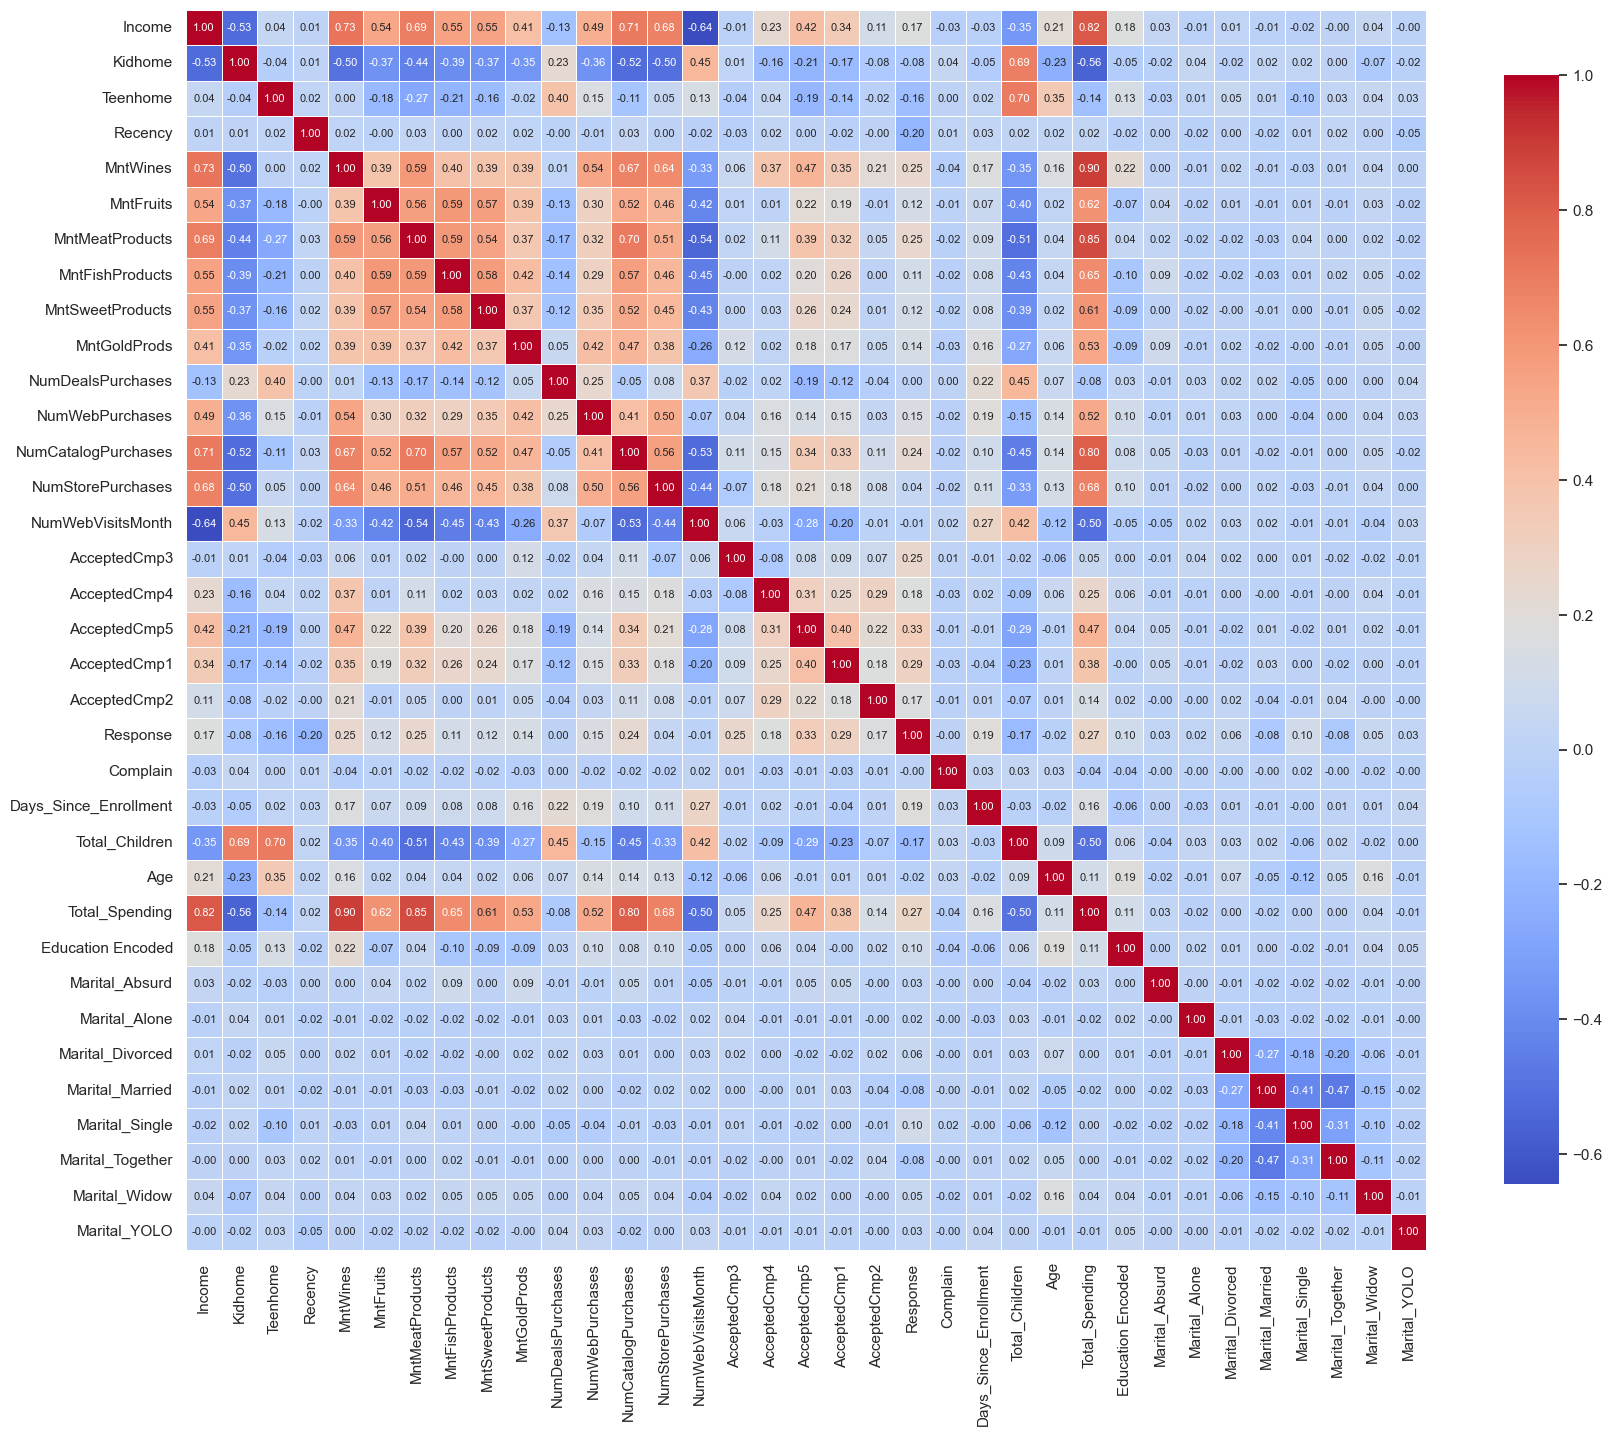

In [24]:
# Calculate the correlation matrix
correlation_matrix = df_new1.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": 0.8}, annot_kws={"size": 8})

# Show the plot
plt.show()

# STEP 9.1 - Testing hypotheses 1 = Older people are not as tech-savvy and probably prefer shopping in-store.

In [25]:
# 'Age' is the column representing age and 'NumStorePurchases' is the column representing in-store purchases
age_young = df_encoded[df_encoded['Age'] < 40]['NumStorePurchases']
age_old = df_encoded[df_encoded['Age'] >= 40]['NumStorePurchases']

# Perform t-test
t_stat, p_value = ttest_ind(age_young, age_old, equal_var=False)

# Print the results
print(f'T-statistic: {t_stat}\nP-value: {p_value}')

# Check if the p-value is below a significance level (e.g., 0.05) to reject the null hypothesis
if p_value < 0.05:
    print("There is a significant difference in in-store purchases between younger and older people.")
    print('And therefore its true that "Older people are not as tech-savvy and probably prefer shopping in-store"')
else:
    print("There is no significant difference in in-store purchases between younger and older people.")
    print('And therefore its not true that "Older people are not as tech-savvy and probably prefer shopping in-store"')

T-statistic: -2.414029744659807
P-value: 0.01632747760333936
There is a significant difference in in-store purchases between younger and older people.
And therefore its true that "Older people are not as tech-savvy and probably prefer shopping in-store"


# STEP 9.2 - Testing hypotheses 2 = Customers with kids probably have less time to visit a store and would prefer to shop online.

In [26]:
# 'NumWebPurchases' is the column representing the number of purchases made through the company's website
# 'Kidhome' is the column representing the presence of kids (1 if there are kids, 0 otherwise)

# Split the data into two groups: customers with kids and customers without kids
web_purchases_with_kids = df_encoded[df_encoded['Kidhome'] == 1]['NumWebPurchases']
web_purchases_without_kids = df_encoded[df_encoded['Kidhome'] == 0]['NumWebPurchases']

# Perform t-test
t_statistic, p_value = ttest_ind(web_purchases_with_kids, web_purchases_without_kids, equal_var=False)

# Print the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Determine the significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a significant difference in online purchases between customers with and without kids.")
    print('And therefore its true that "There is a significant difference in online purchases between customers with and without kids."')
else:
    print("There is no significant difference in online purchases between customers with and without kids.")
    print('And therefore its not true that "There is a significant difference in online purchases between customers with and without kids."')

T-Statistic: -19.408653381527323
P-Value: 2.5808735484888766e-77
There is a significant difference in online purchases between customers with and without kids.
And therefore its true that "There is a significant difference in online purchases between customers with and without kids."


# STEP 9.3 - Testing hypotheses 3 = Other distribution channels may cannibalize sales at the store.

In [27]:
# 'NumStorePurchases' is the column representing the number of purchases made directly in the store
# 'NumWebPurchases', 'NumCatalogPurchases', 'NumDealsPurchases' represent purchases through other channels

# Split the data into two groups: store purchases and purchases through other channels
store_purchases = df_encoded['NumStorePurchases']
other_channel_purchases = df_encoded['NumWebPurchases'] + df_encoded['NumCatalogPurchases'] + df_encoded['NumDealsPurchases']

# Perform t-test
t_statistic, p_value = ttest_ind(store_purchases, other_channel_purchases, equal_var=False)

# Print the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Determine the significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is no significant difference in sales between the store and other distribution channels.")
    print('Therefore its true that "Other distribution channels may cannibalize sales at the store."')
else:
    print("There is no significant difference in sales between the store and other distribution channels.")
    print('Therefore its not true that "Other distribution channels may cannibalize sales at the store."')

T-Statistic: -24.856413539505034
P-Value: 2.6421518760038623e-126
There is no significant difference in sales between the store and other distribution channels.
Therefore its true that "Other distribution channels may cannibalize sales at the store."


# STEP 9.4 - Testing hypotheses 4 = Does the US fare significantly better than the rest of the world in terms of total purchases?

In [28]:
# 'Country' is the column representing the country of the customer
# 'Total_Spending' is the column representing the total spending

# Split the data into two groups: US and other countries
us_spending = df_encoded[df_encoded['Country'] == 'US']['Total_Spending']
other_countries_spending = df_encoded[df_encoded['Country'] != 'US']['Total_Spending']

# Perform t-test
t_statistic, p_value = ttest_ind(us_spending, other_countries_spending, equal_var=False)

# Print the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Determine the significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a significant difference in total purchases between the US and other countries.")
    print('Therefore its true that "The US fare significantly better than the rest of the world in terms of total purchases"')
else:
    print("There is no significant difference in total purchases between the US and other countries.")
    print('Therefore its not true that "The US fare significantly better than the rest of the world in terms of total purchases"')

T-Statistic: 0.13566705169049106
P-Value: 0.892310891071058
There is no significant difference in total purchases between the US and other countries.
Therefore its not true that "The US fare significantly better than the rest of the world in terms of total purchases"


# STEP 10.1 - Visualization to help analyze = Which products are performing the best, and which are performing the least in terms of revenue?

In [29]:
# Mnt* columns represent spending on different products
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate total spending for each product category
total_spending_per_product = df_encoded[product_columns].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
total_spending_per_product.sort_values().plot(kind='bar', color='skyblue')
plt.title('Total Spending on Different Products')
plt.xlabel('Product Categories')
plt.ylabel('Total Spending')
plt.show()

# STEP 10.2 - Visualization to help analyze = Is there any pattern between the age of customers and the last campaign acceptance rate?

In [30]:
# 'Age' is the column representing age and 'AcceptedCmp4' is the column representing the last campaign acceptance
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='AcceptedCmp4', data=df_encoded, ci=None)
plt.title('Bar Plot: Age vs. Mean Last Campaign Acceptance Rate')
plt.xlabel('Age')
plt.ylabel('Mean Last Campaign Acceptance Rate')
plt.tight_layout()
plt.show()


C:\Users\sun24\AppData\Local\Temp\ipykernel_11680\1699840540.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='AcceptedCmp4', data=df_encoded, ci=None)


# STEP 10.3 - Visualization to help analyze = Which Country has the greatest number of customers who accepted the last campaign?

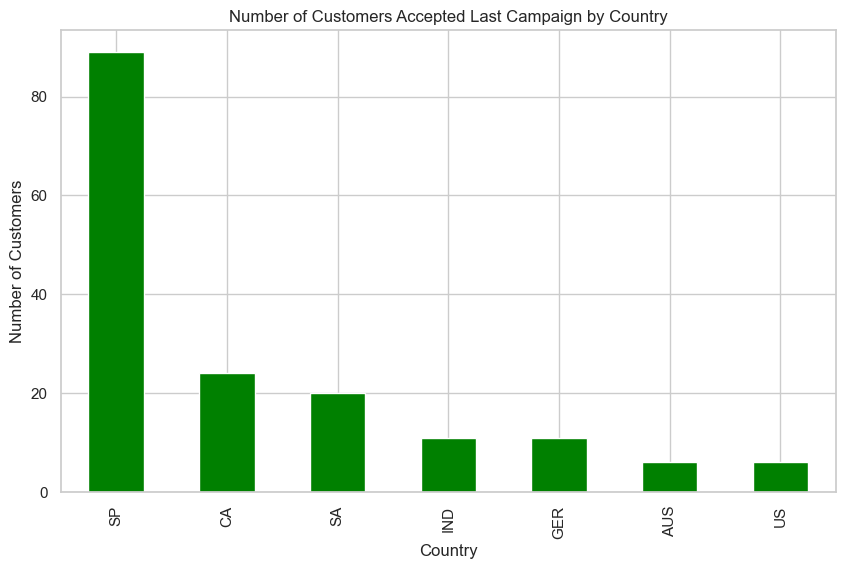

In [31]:
# 'Country' is the column representing the country of the customer and 'AcceptedCmp4' is the column representing the last campaign acceptance
accepted_campaign_by_country = df_encoded[df_encoded['AcceptedCmp4'] == 1]['Country'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
accepted_campaign_by_country.plot(kind='bar', color='green')
plt.title('Number of Customers Accepted Last Campaign by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()

# STEP 10.4 - Visualization to help analyze = Is there any pattern in the number of children at home and total spend?

In [32]:
# 'Kidhome' is the column representing the number of children at home and 'Total_Spending' is the column representing total spending
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.barplot(x='Kidhome', y='Total_Spending', data=df_encoded)
plt.title('Bar Plot: Number of Children at Home vs. Total Spend')
plt.xlabel('Number of Children at Home')
plt.ylabel('Total Spend')
plt.show()

<Figure size 1000x600 with 0 Axes>

# STEP 10.5 - Visualization to help analyze = Education background of the customers who complained in the last 2 years.

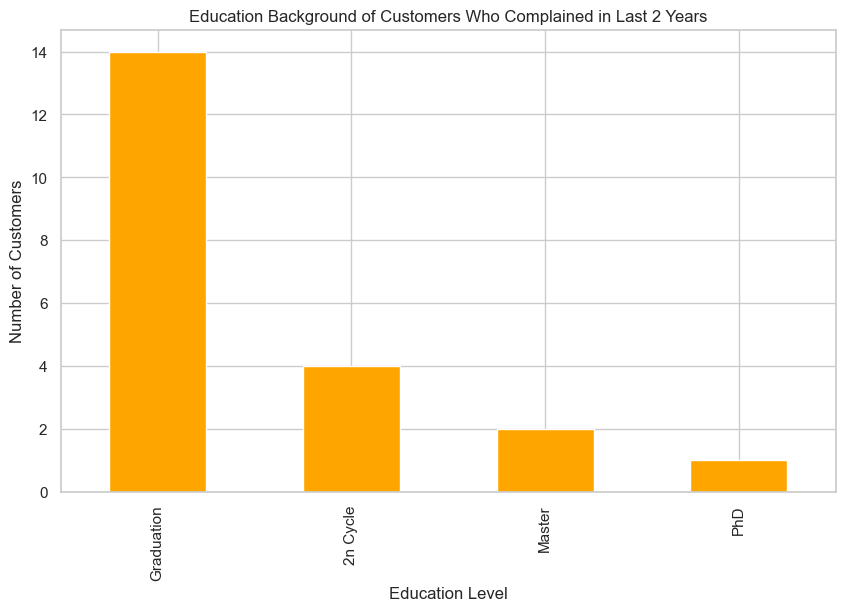

In [33]:
# Education' is the column representing education level and 'Complain' is the column representing whether a customer complained
complained_education = df_encoded[df_encoded['Complain'] == 1]['Education'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
complained_education.plot(kind='bar', color='orange')
plt.title('Education Background of Customers Who Complained in Last 2 Years')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.show()

C:\Users\sun24\AppData\Local\Temp\ipykernel_11680\1089939779.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='AcceptedCmp4', data=df_encoded, ci=None)


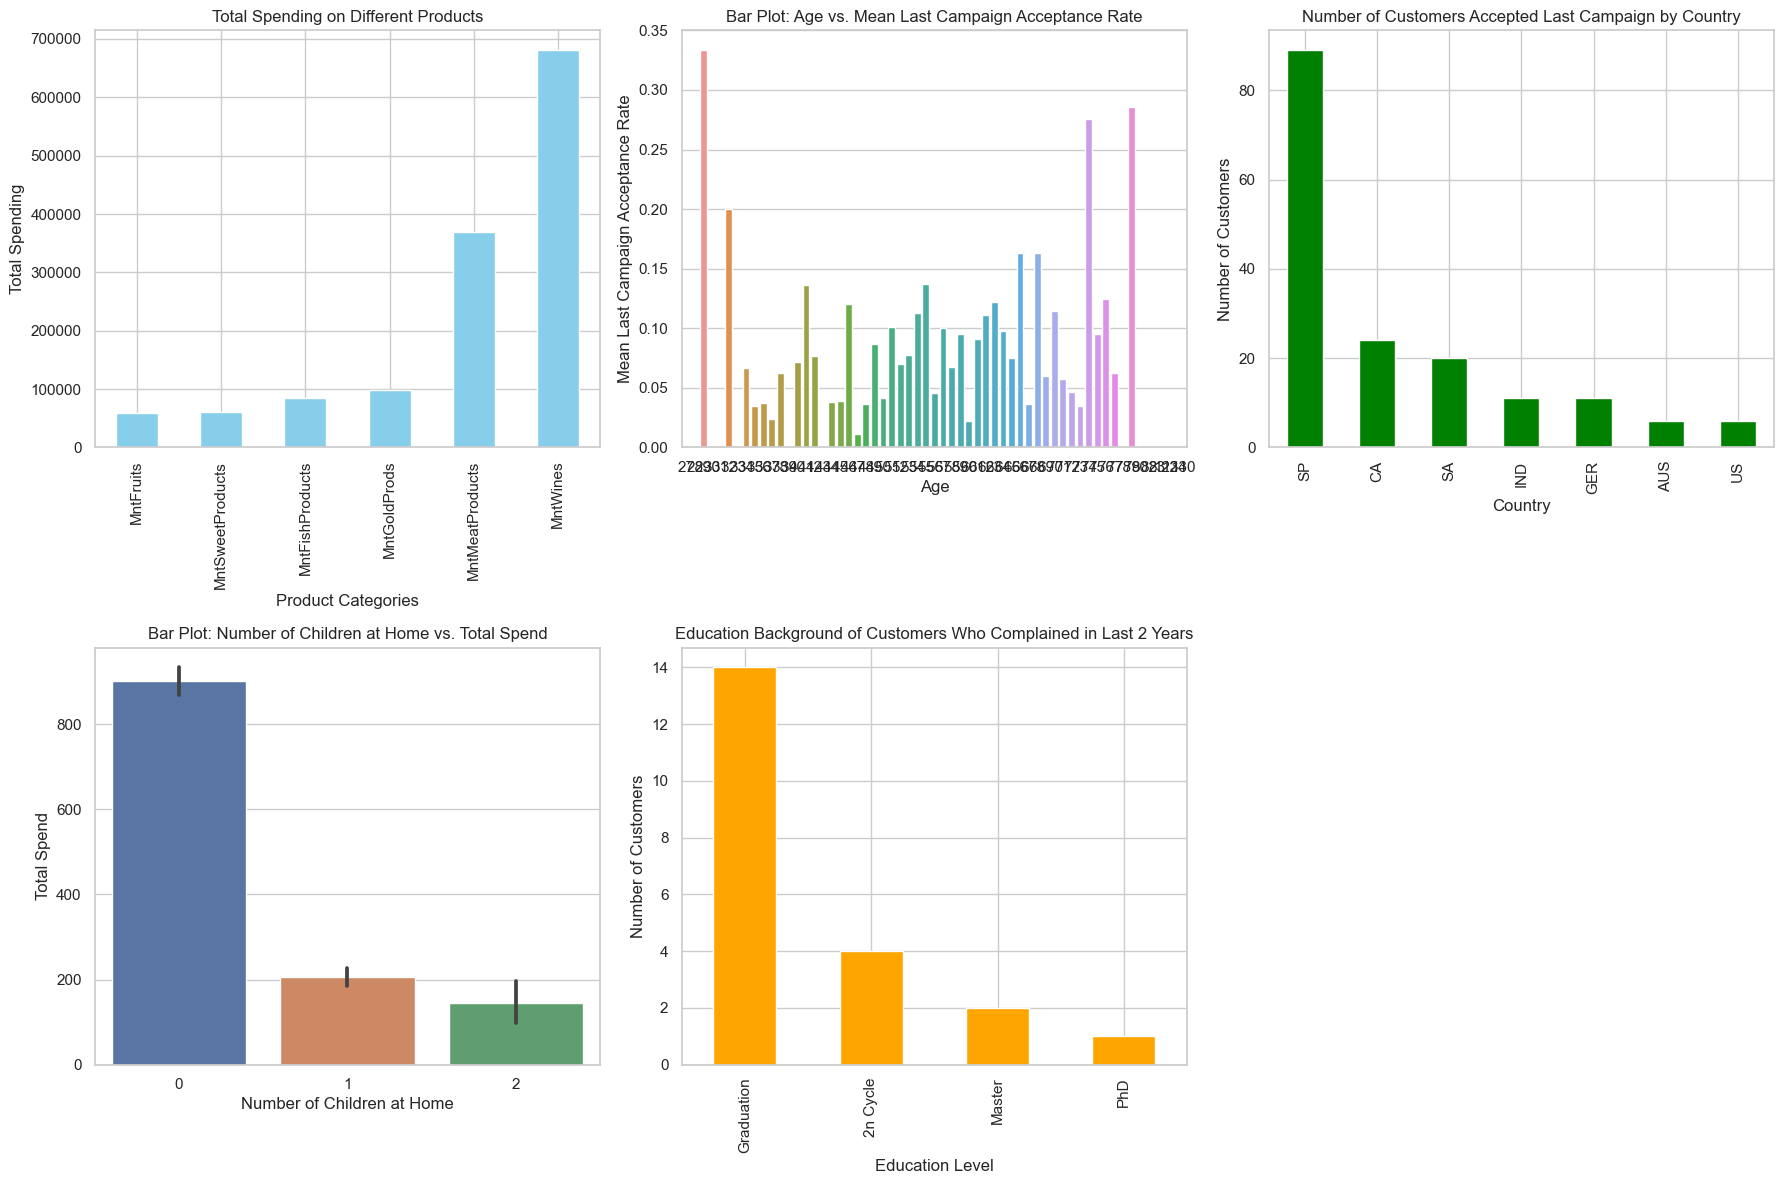

In [34]:
# Viewing all the 5 graphs in one slide

# Set the overall figure size
plt.figure(figsize=(18, 12))

# Plot 1
plt.subplot(2, 3, 1)
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending_per_product = df_encoded[product_columns].sum()
total_spending_per_product.sort_values().plot(kind='bar', color='skyblue')
plt.title('Total Spending on Different Products')
plt.xlabel('Product Categories')
plt.ylabel('Total Spending')

# Plot 2
plt.subplot(2, 3, 2)
sns.barplot(x='Age', y='AcceptedCmp4', data=df_encoded, ci=None)
plt.title('Bar Plot: Age vs. Mean Last Campaign Acceptance Rate')
plt.xlabel('Age')
plt.ylabel('Mean Last Campaign Acceptance Rate')

# Plot 2 (wider)
plt.subplot(1, 2, 2)
sns.barplot(x='Age', y='AcceptedCmp4', data=df_encoded, ci=None)
plt.title('Bar Plot: Age vs. Mean Last Campaign Acceptance Rate')
plt.xlabel('Age')
plt.ylabel('Mean Last Campaign Acceptance Rate')

# Plot 3
plt.subplot(2, 3, 3)
accepted_campaign_by_country = df_encoded[df_encoded['AcceptedCmp4'] == 1]['Country'].value_counts()
accepted_campaign_by_country.plot(kind='bar', color='green')
plt.title('Number of Customers Accepted Last Campaign by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')

# Plot 4
plt.subplot(2, 3, 4)
sns.barplot(x='Kidhome', y='Total_Spending', data=df_encoded)
plt.title('Bar Plot: Number of Children at Home vs. Total Spend')
plt.xlabel('Number of Children at Home')
plt.ylabel('Total Spend')

# Plot 5
plt.subplot(2, 3, 5)
complained_education = df_encoded[df_encoded['Complain'] == 1]['Education'].value_counts()
complained_education.plot(kind='bar', color='orange')
plt.title('Education Background of Customers Who Complained in Last 2 Years')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
###